CAU 1:

DATA PRE-PROCESSING

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('D:/LAP TRINH/DS102.P21.2/forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df.shape

(517, 13)

In [ ]:
df.columns.values

array(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'], dtype=object)

In [ ]:
for col_name in df.columns:
    print('Total NaN: ', df[col_name].isna().sum(), 'in column', col_name)
    print('Total null: ', df[col_name].isnull().sum(), 'in column', col_name)
    print('Data type:', df[col_name].dtype, 'in column', col_name)
    print("_"*10)

Total NaN:  0 in column X
Total null:  0 in column X
Data type: int64 in column X
__________
Total NaN:  0 in column Y
Total null:  0 in column Y
Data type: int64 in column Y
__________
Total NaN:  0 in column month
Total null:  0 in column month
Data type: object in column month
__________
Total NaN:  0 in column day
Total null:  0 in column day
Data type: object in column day
__________
Total NaN:  0 in column FFMC
Total null:  0 in column FFMC
Data type: float64 in column FFMC
__________
Total NaN:  0 in column DMC
Total null:  0 in column DMC
Data type: float64 in column DMC
__________
Total NaN:  0 in column DC
Total null:  0 in column DC
Data type: float64 in column DC
__________
Total NaN:  0 in column ISI
Total null:  0 in column ISI
Data type: float64 in column ISI
__________
Total NaN:  0 in column temp
Total null:  0 in column temp
Data type: float64 in column temp
__________
Total NaN:  0 in column RH
Total null:  0 in column RH
Data type: int64 in column RH
__________
Tota

In [ ]:
def convert_day(day: str)->int:
    day_dict = {
        'mon': 2,
        'tue': 3,
        'wed': 4, 
        'thu': 5,
        'fri': 6,       
        'sat': 7,
        'sun': 8          
    }
    return day_dict[day]

In [ ]:
def convert_month(month: str)->int:
    month_dict = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr': 4,
        'may': 5,
        'jun': 6,
        'jul': 7,
        'aug': 8,
        'sep': 9,
        'oct': 10,
        'nov': 11,
        'dec': 12
    }
    return month_dict[month]    

In [ ]:
df['month'] = df['month'].apply(convert_month)

In [ ]:
df['day'] = df['day'].apply(convert_day)

MODEL


In [ ]:
class LinearRegression:
    # RMSE : Root Mean Square Error
    def rmse (self, Y: np.array, Y_pred: np.array)->float:
        return ((Y - Y_pred)**2).mean()**0.5
    
    def fit(self, X: np.array, y: np.array)->None:
        self.thelta = np.linalg.inv(X.T @ X) @ (X.T @ y)
    
    def predict(self, X: np.array)->np.array:
        y = self.thelta.T @ X.T
        return y  

In [ ]:
X_Y = df.to_numpy()
X_Y

array([[ 7.  ,  5.  ,  3.  , ...,  6.7 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  0.9 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  1.3 ,  0.  ,  0.  ],
       ...,
       [ 7.  ,  4.  ,  8.  , ...,  6.7 ,  0.  , 11.16],
       [ 1.  ,  4.  ,  8.  , ...,  4.  ,  0.  ,  0.  ],
       [ 6.  ,  3.  , 11.  , ...,  4.5 ,  0.  ,  0.  ]], shape=(517, 13))

In [ ]:
row = df.shape[0]
X_Y_train, X_Y_test = np.split(X_Y, indices_or_sections=[int(0.8*row)])

In [ ]:
X_Y_train

array([[ 7.  ,  5.  ,  3.  , ...,  6.7 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  0.9 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  1.3 ,  0.  ,  0.  ],
       ...,
       [ 6.  ,  3.  ,  2.  , ...,  2.7 ,  0.  ,  0.  ],
       [ 7.  ,  4.  ,  2.  , ...,  9.4 ,  0.  ,  4.62],
       [ 9.  ,  4.  ,  7.  , ...,  4.5 ,  0.  ,  1.63]], shape=(413, 13))

In [ ]:
lr = LinearRegression()

In [ ]:
X_train = X_Y_train[:,:12]
Y_train = X_Y_train[:,12:]

X_test = X_Y_test[:, :12]
Y_test = X_Y_test[:, 12:]

In [ ]:
lr.fit(X_train, Y_train)

In [ ]:
Y_pred = lr.predict(X_test)

In [ ]:
Y_pred

array([[ 33.59102041,  27.34017299,  26.83638958,  17.47930084,
          3.67125484,  26.20233237,  26.60012038,  25.31952987,
         18.32030495,  40.2768549 ,   9.92501608,  34.88131479,
         21.1837366 ,  25.91157362,  18.63857625,  18.35312283,
         26.07707169,  32.70005628,  21.13849988,  22.95029306,
         18.98276194,  25.9939789 ,  14.97722563,  23.47441706,
         20.60634589,  22.12265066,   8.58769564,  27.59268934,
         24.61690574,  -1.60966828,  -6.48524113,  23.80417863,
         11.80119756,  21.25312297,  -3.44310848,  16.92877287,
         24.56622202,  10.17651632,  -1.88491102,  15.59290822,
         23.08041842,  20.2597266 ,  -0.4029118 ,  18.32875732,
         14.02228967,  24.05787507,  23.70541129,  17.90544586,
         24.05787507,  21.17389256, -11.13503844,  -9.23476326,
         -1.30597277,  -3.86984769,  -1.8907285 ,   5.9642239 ,
         10.1992655 ,  11.31715994,  12.81743683,   6.70255799,
         17.89651389,  15.27383857,   4.

In [ ]:
lr.rmse(Y_test, Y_pred)

np.float64(81.04405295404759)

In [ ]:
import matplotlib.pyplot as plt

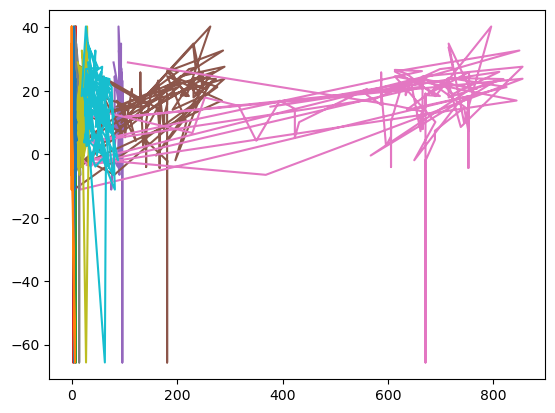

In [ ]:
plt.plot(X_test, Y_pred.T)